<a id='toc'></a>
### Table of Contents

1. [The Zen of Python](#The-Zen-of-Python)
2. <a href='#kwd'>Keywords</a>
3. <a href='#caem'>Command and Edit Modes</a>
4. <a href='#smdex'>Some Markdown Examples</a>
5. <a href='#mfalt'>Math Formulae and using LaTex</a>
6. <a href='#bif'>Built-in Functions</a>
7. <a href='#strings'>Formatted Strings</a>
8. <a href='#shadeepcopy'>Shallow and Deep Copies</a>
9. <a href='#ladcomp'>List and Dict Comprehensions</a>
10. <a href='#numpy'>Numpy</a>
11. <a href='#arraydtypes'>Array Data Types</a>
12. <a href='#pandas'>Pandas</a>
13. <a href='#readwrite'>Reading/Writing Files</a>

In [47]:
# importing libraries and activating matplotlib inline and some needed display options
import numpy as np
import pandas as pd
import matplotlib as mpl

pd.set_option('display.max_colwidth', None)
pd.options.display.max_columns = None
%matplotlib inline

In [3]:
# Loading data
path_to_data = '../../00_Common_Data_Sets/csv_files/pittsburgh2013.csv'

df = pd.read_csv(path_to_data, index_col = 'Date', parse_dates=True)
df.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,32,28,21,30,27,16,100,89,77,30.10,...,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-01-02,25,21,17,14,12,10,77,67,55,30.27,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,...,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [45]:
# Checking column names
for column in df.columns:
    if column.startswith(" "):
        print(column, "-> This column name has prepended spaces!")
    elif column.endswith(" "):
        print(column, "-> This column name has appended spaces!")
    else:
        print(column)

Max TemperatureF
Mean TemperatureF
Min TemperatureF
Max Dew PointF
MeanDew PointF
Min DewpointF
Max Humidity
Mean Humidity
Min Humidity
Max Sea Level PressureIn
Mean Sea Level PressureIn
Min Sea Level PressureIn
Max VisibilityMiles
Mean VisibilityMiles
Min VisibilityMiles
Max Wind SpeedMPH
Mean Wind SpeedMPH
Max Gust SpeedMPH
PrecipitationIn
 CloudCover -> This column name has prepended spaces!
Events
WindDirDegrees


In [46]:
# As we see clearly above, the column "CloudCover" has a space in its name, thus we should be careful while calling this column.
df[' CloudCover'].sample(3)

Date
2013-09-08    5
2013-05-27    2
2013-06-06    8
Name:  CloudCover, dtype: int64

In [5]:
df[(df["Mean TemperatureF"] == 28) & (df["Mean Humidity"] <= 68) ] 

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.0,4,NaN,250
2013-03-22,33,28,24,19,18,16,78,67,54,30.05,...,10,10,7,16,12,24.0,0.0,6,Snow,276
2013-12-13,34,28,21,17,11,3,59,50,45,30.29,...,10,10,10,15,9,NaN,0.0,2,NaN,233


In [6]:
df.sort_values(by=['Max TemperatureF', 'Min TemperatureF'], ascending=[True, False]).head(7)

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-22,12,9,6,3,-2,-6,70,60,48,30.32,...,10,10,6,17,13,26.0,0.0,4,NaN,274
2013-01-23,16,11,6,10,1,-3,80,62,45,30.34,...,10,10,7,13,8,20.0,0.0,4,NaN,247
2013-01-25,19,16,12,16,10,3,86,76,58,30.52,...,10,5,0,9,4,NaN,0.0,7,Fog-Snow,124
2013-02-17,21,18,15,19,12,3,93,77,53,30.28,...,10,4,0,18,10,29.0,0.0,8,Fog-Snow,304
2013-01-24,21,16,12,11,6,-5,88,67,33,30.57,...,10,8,2,14,5,21.0,0.0,5,Snow,324
2013-02-01,21,16,9,19,8,0,93,72,59,30.38,...,10,7,1,21,10,30.0,0.0,7,Snow,277
2013-02-20,23,20,17,16,12,7,86,75,57,30.25,...,10,5,1,24,14,37.0,0.0,8,Snow,273


In [9]:
df.sort_index(ascending=False).head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-31,26,24,23,21,17,12,85,73,60,30.34,...,10,6,0,22,9,33.0,0.00,7,Snow,235
2013-12-30,41,32,23,37,21,14,87,76,64,30.22,...,10,8,1,16,9,26.0,0.01,8,Rain-Snow,320
2013-12-29,44,42,39,40,37,23,100,87,45,30.03,...,10,5,0,15,8,21.0,0.66,8,Fog-Rain,301
2013-12-28,52,43,34,27,24,19,56,47,38,30.27,...,10,10,10,16,10,20.0,0.00,0,NaN,197
2013-12-27,41,34,27,25,20,14,66,56,48,30.39,...,10,10,10,12,8,NaN,0.00,4,NaN,207


In [51]:
df.groupby('Events').size()

Events
Fog                      14
Fog-Rain                 15
Fog-Rain-Snow             5
Fog-Rain-Thunderstorm     7
Fog-Snow                 14
Rain                     90
Rain-Snow                10
Rain-Thunderstorm        12
Snow                     40
dtype: int64

<AxesSubplot:ylabel='Frequency'>

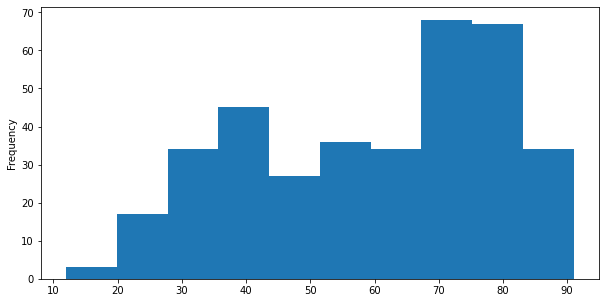

In [52]:
df['Max TemperatureF'].plot.hist(figsize=(10, 5))

In [27]:
df[df.Events == 'Fog'][['Max Dew PointF', 'Max TemperatureF']]

,Max Dew PointF,Max TemperatureF
Date,,
2013-01-29,54,68
2013-04-17,57,66
2013-06-07,63,66
2013-07-18,75,90
2013-08-12,67,82
2013-08-30,69,86
2013-09-03,63,72
2013-09-07,56,78
2013-09-15,54,70
